# BNL Development Notebook

This notebook is for developing and testing the BNL package.


In [1]:
%load_ext autoreload
%autoreload 2

import bnl

In [2]:
# R2_BUCKET_PUBLIC_URL = "https://pub-05e404c031184ec4bbf69b0c2321b98e.r2.dev"
slm_ds_local = bnl.data.Dataset(manifest_path="~/data/salami/metadata.csv")
# slm_ds_cloud = bnl.data.Dataset(manifest_path=f"{R2_BUCKET_PUBLIC_URL}/manifest_cloud_boolean.csv")
track = next(iter(slm_ds_local))
# cloud_track = next(iter(slm_ds_cloud))

# local_track.load_hierarchy("reference")
# cloud_track.load_hierarchy("reference")

In [3]:
## let's get an estimate hierarchy for a track:
# WIP this API should be better.
slm_ds = bnl.data.Dataset(manifest_path="~/data/salami/metadata.csv")
track = slm_ds[776]
est = track.load_annotation("adobe-mu1gamma9")

In [ ]:
print(type(est))
print(est)

<class 'bnl.core.Hierarchy'>
Hierarchy(name='None', 12 layers, duration=193.75s)


(<Figure size 600x400 with 1 Axes>, <Axes: xlabel='Time (s)'>)

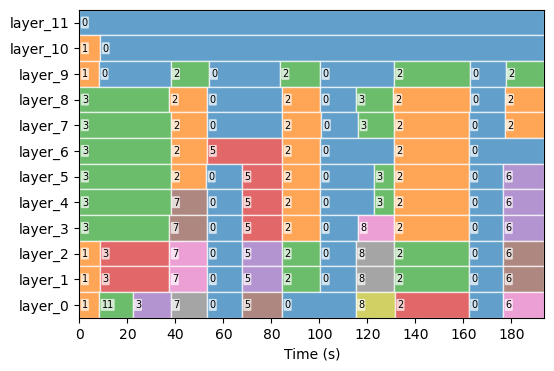

In [6]:
est.plot2()

[autoreload of bnl.core failed: Traceback (most recent call last):
  File "/Users/tomxi/code/bnl/.pixi/envs/default/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 283, in check
    superreload(m, reload, self.old_objects)
  File "/Users/tomxi/code/bnl/.pixi/envs/default/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 508, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/tomxi/code/bnl/.pixi/envs/default/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 405, in update_generic
    update(a, b)
  File "/Users/tomxi/code/bnl/.pixi/envs/default/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    if update_generic(old_obj, new_obj):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tomxi/code/bnl/.pixi/envs/default/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 405, in update_generic
    update(a, b)
  File "/Users/tomxi/code/bnl/.pixi/envs/defa

AttributeError: module 'bnl.ops' has no attribute 'to_monotonic'

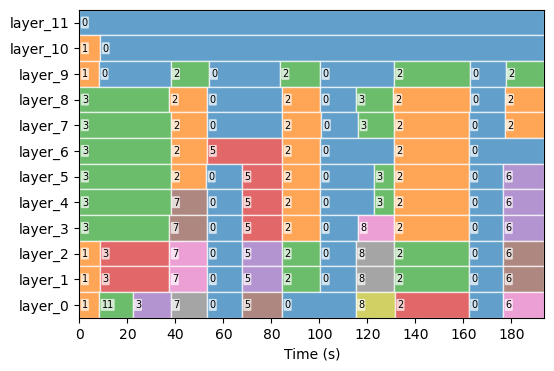

In [ ]:
# est.plot2()
new_est = bnl.ops.to_monotonic(est)
# new_est.plot2()

In [ ]:
print(type(est))
print(est)

<class 'bnl.core.Hierarchy'>
Hierarchy(name='None', 12 layers, duration=193.75s)


<class 'bnl.core.Hierarchy'>
Hierarchy(name='None', 12 layers, duration=193.75s)


ValueError: need at least one array to concatenate

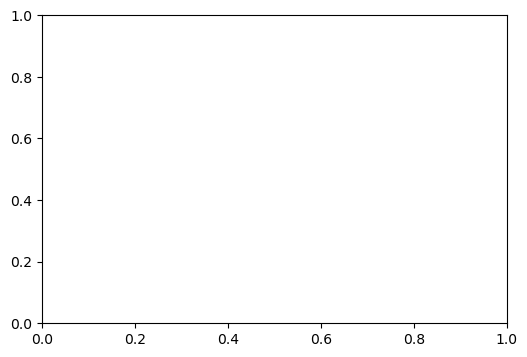

In [51]:
new_est.plot2()

In [97]:
import jams

# Assuming slm_ds refers to slm_ds_local for these JAMS operations
slm_ds = slm_ds_local
jam = jams.load(str(slm_ds["4"].annotations["reference"]))
a = jam.search(namespace="multi_segment")[1]
bnl.Hierarchy.from_jams(a)

Hierarchy(2 levels over 0.00s-236.09s)

In [98]:
# Assuming slm_ds refers to slm_ds_local
slm_ds = slm_ds_local
jam = jams.load(str(slm_ds["4"].annotations["reference"]))
a = jam.search(namespace="segment_salami_function")[1]
bnl.Segmentation.from_jams(a)

Segmentation(11 segments over 236.09s)

In [96]:
itvls, labs = jams.eval.hierarchy_flatten(a)
for itl, lbl in zip(itvls, labs):
    print(bnl.Segmentation.from_intervals(itl, lbl))

Segmentation(18 segments over 236.09s)
Segmentation(32 segments over 236.09s)


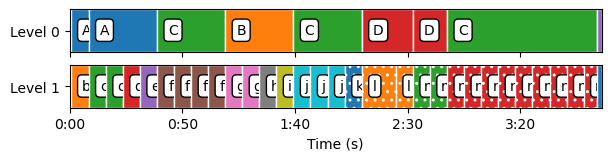

In [115]:
# Assuming slm_ds refers to slm_ds_local
slm_ds = slm_ds_local
jam = jams.load(str(slm_ds["4"].annotations["reference"]))
b = jam.search(namespace="multi_segment")[0]
bnl.Hierarchy.from_jams(b).plot();

In [47]:
jams.eval.hierarchy_flatten(a)

([[array([0.      , 0.464399]),
   array([ 0.464399, 14.379864]),
   array([14.379864, 23.986213]),
   array([23.986213, 33.622494]),
   array([33.622494, 42.956916]),
   array([42.956916, 49.68102 ]),
   array([49.68102 , 76.881292]),
   array([76.881293, 86.425397]),
   array([86.425397, 98.689433]),
   array([ 98.689433, 108.166304]),
   array([108.166304, 115.47449 ]),
   array([115.47449 , 129.466939]),
   array([129.466939, 137.682789]),
   array([137.682789, 160.601927]),
   array([160.601927, 177.151723]),
   array([177.151723, 194.691837]),
   array([194.691837, 242.415329]),
   array([242.415329, 250.548934]),
   array([250.548934, 263.20542 ]),
   array([263.20542 , 264.896825])],
  [array([0.      , 0.464399]),
   array([0.464399, 5.19127 ]),
   array([5.19127 , 9.979841]),
   array([ 9.979841, 14.379864]),
   array([14.379864, 19.643855]),
   array([19.643855, 23.986213]),
   array([23.986213, 28.98254 ]),
   array([28.98254 , 33.622495]),
   array([33.622494, 38.243265]),

(0.0, 2.0)

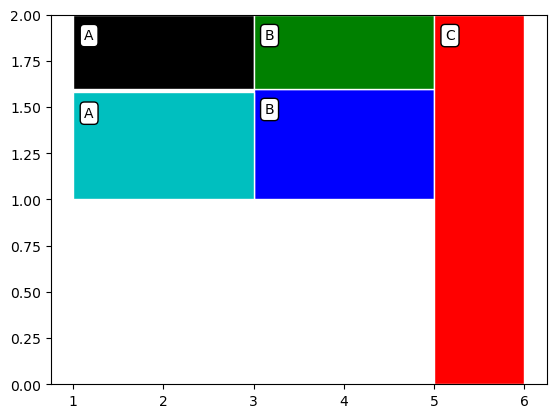

In [41]:
seg = bnl.Segmentation.from_boundaries([1, 3, 5, 6], labels=["A", "B", "C", "D"])

fig, ax = seg[0].plot(ymin=0.8, ymax=1.0, color="k")

seg[1].plot(ax=ax, ymin=0.5, ymax=0.8, color="b")
seg[1].plot(ax=ax, ymin=0.8, ymax=1.0, color="g")
seg[2].plot(ax=ax, color="r")
seg[0].plot(ax=ax, ymin=0.5, ymax=0.79, color="c")

ax.set_ylim(0, 2)

Text(0.5, 1.0, 'TimeSpan([1.0-3.0s])')

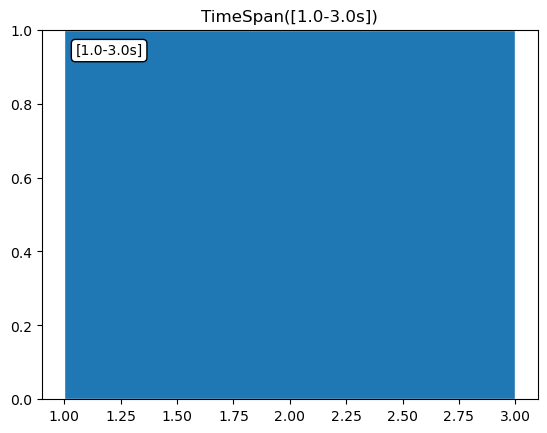

In [39]:
span = bnl.TimeSpan(1, 3)

fig, ax = span.plot()
ax.set_title(repr(span))

## Todo items:
- [x] Add a `Hierarchy` class to core.py
- [x] Add a module for dealing with jams and datasets, currently only SALAMI. 
- [ ] Add a `Segmentation.plot()`
- [ ] Add a `Hierarchy.plot()`
- [ ] add eval.py a module for evaluating metrics.
    - [ ] get the fast and mir_eval version of the flat metrics working. eval/flat.py
    - [ ] get the fast and mir_eval version of L-measure and T-measure working. eval/hier.py
    - [ ] get bmeasure working. eval/hier.py
    - [ ] logic, processing, and hidden functions in eval/utils.py
- [ ] Boundary salience curve for Hierarchy, and coding and decoding to monotonic hierarchies.

So the consideration is whether to make aother class that's Monotonic Hierarchy, or to add casting methods to the Hierarchy class.

Yea.. I think we should have a different class for Monotonic Hierarchy, and then add casting methods to the Hierarchy class for conversion.


